ПРОЕКТ:

0) Изучаете контекст датасета и придумываете бизнес-цель
1) Делаете постановку задач на исследование (минимум 2 задачи, 1 под классфификацию/регрессию, 1 под кластеризацию (в крайнем случае делаем допущение что у нас нет Y) , )
2) Оценка Датасета (pandas/np/statsmodel...)
3) Подготовка данных
4) Выполнение исследований ( в том числе с промежуточными итогами, визуализациями)
5) Итоговые визуализации и выводы
6) Предложения по развитию вашей работы

1) Кластеризация

В данном проекте предстоит работа с общедоступным набором данных о людях и их жизненных показателей с целью предсказать вероятность инсульта у той или иной группы лиц

Цель: На основе имеющегося датасета построить модель, позволяющую отнести ту или иную группу лиц к определнной категории, вполне однозначно описывающей вероятность появяления инсульта

Общая постновка:
       Частная медицинская клиника N, выполняющая исследования преимущественно связанные с острым нарушением кровоснабжения головного мозга, характеризующееся внезапным (в течение нескольких минут, часов) появлением очаговой и/или общемозговой неврологической симптоматики  (инсультом) приняла решение обратиться в мою компанию RUS с целью оказать им услугу категоризации  пациентов по определенным критериям с целью дальнейшего предсказания вероятности инсульта у той или иной группы пациентов.

Актуальность исследования:

    По данным Всемирной организации здравоохранения (ВОЗ), инсульт занимает второе место среди причин смерти в мире, на него приходится около 11% всех смертей. Что говорят об остроте и очевидной актуальности выбранной темы исследования.

    Медицинская лаборатория любезно предоставила нам набор данных, отраженный в полном объеме в файле с незамысловатым названием healthcare.csv
    Данный файл содержит в себе удивительно огромный набор данных, ведь в нем содержится информация о более чем 5000 пациентов (если быть максимально точным, то 5110 пациентов) и набор из 12 признаков в полном объеме определяющих пациентов 


In [1]:
import pandas as pd # reading all required header files
import numpy as np
import random
import operator
import math
import matplotlib.pyplot as plt 
from scipy.stats import multivariate_normal     # for generating pdf
import numpy as np 
import pandas as pd
import os
import matplotlib .pyplot as plt 
%matplotlib inline
import seaborn as sns
import warnings
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.manifold import TSNE
import warnings
warnings.filterwarnings('ignore')
from fcmeans import FCM
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer
from minisom import MiniSom
from pylab import bone, pcolor, colorbar, plot, show

In [2]:
FILEPATH = 'healthcare.csv'
dataset = pd.read_csv(FILEPATH)
dataset = dataset.reset_index(drop = True)
dataset

id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
1     51676  Female  61.0             0              0          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0           Private          Urban             228.69  36.6  formerly smoked   
1     Self-employed          Rural             202.21   NaN     never smoked   
2           Private          Rural             105.92  32.5     never smoked   
3           Private          Urban             171.23  34.4           smokes   
4     Self-employed          Rural             174.12  24.0     never smoked   
...             ...            ...                ...   ...              ...   
5105        Private          Urban              83.75   NaN     never smoked   
5106  Self-employed          Urban             125.20  40.0     never smoked   
5107  Self-employed          Rural              82.99  30.6     never smoked   
5108        Private          Rural             166.29  25.6  formerly smoked   
5109       Govt_job          Urban              85.28  26.2          Unknown   

      stroke  
0          1  
1          1  
2          1  
3          1  
4          1  
...      ...  
5105       0  
5106       0  
5107       0  
5108       0  
5109       0  

[5110 rows x 12 columns]

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


Набор данных содержит данные о 5110 пациентах и для каждого из них имеется следующие 11 показателей:

id-айди пациента

gender-Пол

age-Возраст пациента

hypertension-Наличие гипертонии

heart_disease-Наличие заболеваний сердца 

Ever_maried-Наличие брака

Work_type-Тип работы

Residence_type-Местность проживания

Avg_glucose_level-Средний уровень глюкозы

bmi-Индекс массы тела

Smoking_status-Статус курения

stroke-Наличие инсульта






Показатель id не представляет из себя никакой ценности, по этому он будет исключен из нашего набора данных.

Также можно заметить, что не все показатели представляют числовые значения, с этим фактом нам предстоит разобраться

In [4]:
dataset.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

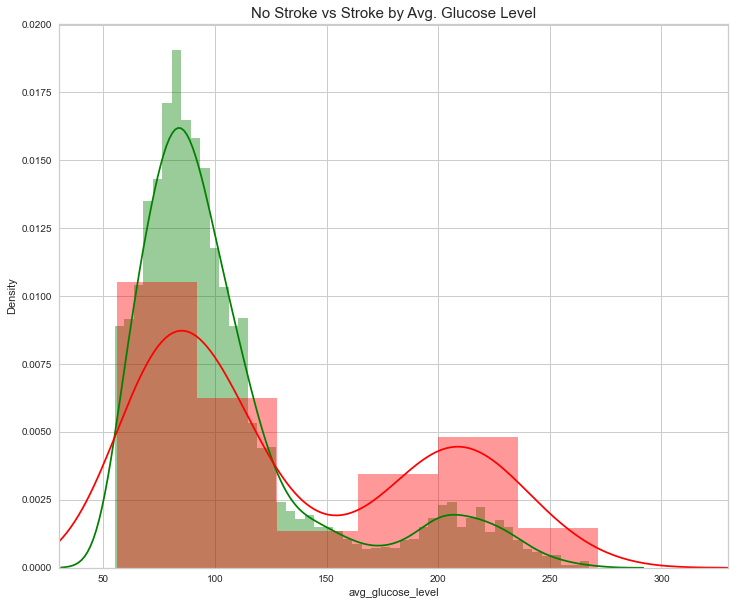

In [5]:
plt.figure(figsize=(12,10))

sns.distplot(dataset[dataset['stroke'] == 0]["avg_glucose_level"], color='green') # No Stroke - green
sns.distplot(dataset[dataset['stroke'] == 1]["avg_glucose_level"], color='red') # Stroke - Red

plt.title('No Stroke vs Stroke by Avg. Glucose Level', fontsize=15)
plt.xlim([30,330])
plt.show()

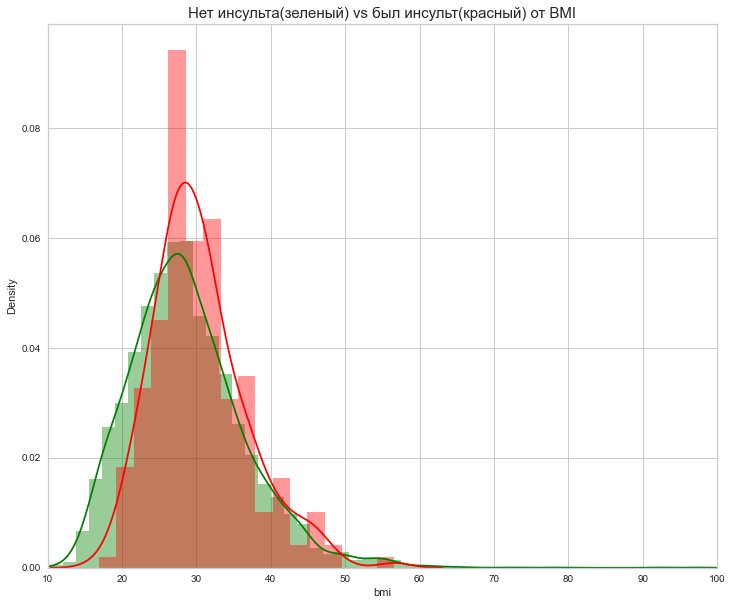

In [6]:
plt.figure(figsize=(12,10))

sns.distplot(dataset[dataset['stroke'] == 0]["bmi"], color='green') # No Stroke - green
sns.distplot(dataset[dataset['stroke'] == 1]["bmi"], color='red') # Stroke - Red

plt.title( 'Нет инсульта(зеленый) vs был инсульт(красный) от BMI', fontsize=15)
plt.xlim([10,100])
plt.show()

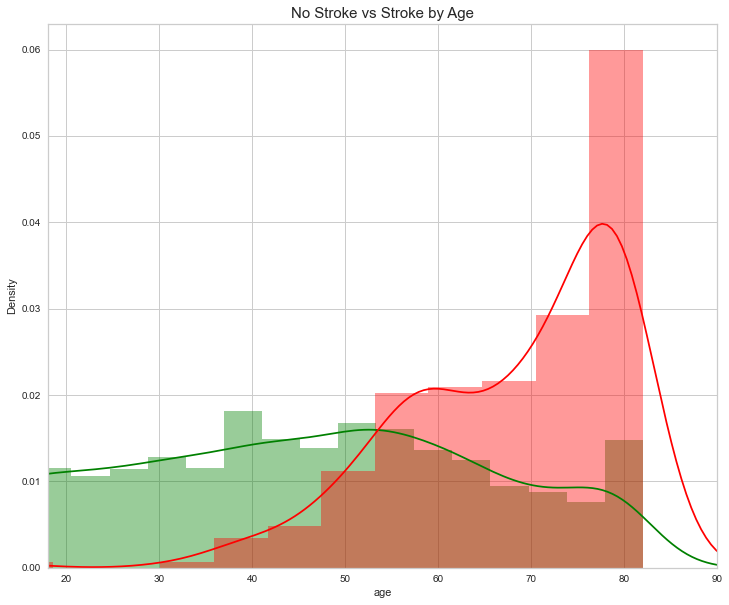

In [7]:
plt.figure(figsize=(12,10))

sns.distplot(dataset[dataset['stroke'] == 0]["age"], color='green') # No Stroke - green
sns.distplot(dataset[dataset['stroke'] == 1]["age"], color='red') # Stroke - Red

plt.title('No Stroke vs Stroke by Age', fontsize=15)
plt.xlim([18,90])
plt.show()

Можно четко заметить, что люди подверженные инсульту в большинстве своем имели повышенный уровень глюкозы, достаточно низкий ИМТ и большой возраст пациентов

Однако некоторые признаки все еще имеет нечисловые значения, для исправления этой оплощности используем кодировщик LabelEncoder

In [8]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
gender=enc.fit_transform(dataset['gender'])
smoking_status=enc.fit_transform(dataset['smoking_status'])
work_type=enc.fit_transform(dataset['work_type'])
Residence_type=enc.fit_transform(dataset['Residence_type'])
ever_married=enc.fit_transform(dataset['ever_married'])
dataset['ever_married']=ever_married
dataset['Residence_type']=Residence_type
dataset['smoking_status']=smoking_status
dataset['gender']=gender
dataset['work_type']=work_type
dataset[['ever_married', 'Residence_type', 'smoking_status', 'gender', 'work_type']].head()

ever_married  Residence_type  smoking_status  gender  work_type
0             1               1               1       1          2
1             1               0               2       0          3
2             1               0               2       1          2
3             1               1               3       0          2
4             1               0               2       0          3

Итак пустые строки присутствуют, но избавимся мы от них немного позже. Сейчас же изучим нашу выборку на наличие выбросов.
Найдем выбросы используя IQR(межквартильный размах)
Для начала вычислим первый и третий квантили Q1 и Q3
Затем оценим межквартильный размах IQR= Q3 - Q1
Оцениваем нижнюю и верхнюю границы: minimum и maximum
Точки данных, лежащие за пределами нижней и верхней границ, являются выбросами.

In [9]:
dataset1=dataset['stroke']
dataset=dataset.drop(['stroke'], axis=1)

In [10]:
dataset

id  gender   age  hypertension  heart_disease  ever_married  \
0      9046       1  67.0             0              1             1   
1     51676       0  61.0             0              0             1   
2     31112       1  80.0             0              1             1   
3     60182       0  49.0             0              0             1   
4      1665       0  79.0             1              0             1   
...     ...     ...   ...           ...            ...           ...   
5105  18234       0  80.0             1              0             1   
5106  44873       0  81.0             0              0             1   
5107  19723       0  35.0             0              0             1   
5108  37544       1  51.0             0              0             1   
5109  44679       0  44.0             0              0             1   

      work_type  Residence_type  avg_glucose_level   bmi  smoking_status  
0             2               1             228.69  36.6               1  
1             3               0             202.21   NaN               2  
2             2               0             105.92  32.5               2  
3             2               1             171.23  34.4               3  
4             3               0             174.12  24.0               2  
...         ...             ...                ...   ...             ...  
5105          2               1              83.75   NaN               2  
5106          3               1             125.20  40.0               2  
5107          3               0              82.99  30.6               2  
5108          2               0             166.29  25.6               1  
5109          0               1              85.28  26.2               0  

[5110 rows x 11 columns]

In [11]:
def outlier_percent(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    minimum = Q1 - (1.5 * IQR)
    maximum = Q3 + (1.5 * IQR)
    num_outliers = np.sum((data < minimum) | (data > maximum))
    num_total = data.count()
    return (num_outliers/num_total)*100


non_categorical_data = dataset.drop(['id'], axis=1)
for column in non_categorical_data.columns:
    data = non_categorical_data[column]
    percent = str(round(outlier_percent(data), 2))

Всем выбросам присваиваем значение NaN

In [12]:
for column in non_categorical_data.columns:
    data = non_categorical_data[column]

    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    minimum = Q1 - (1.5 * IQR)
    maximum = Q3 + (1.5 * IQR)

    outliers = ((data < minimum) | (data > maximum))
    non_categorical_data[column].loc[outliers] = np.nan

In [13]:
non_categorical_data.isna().sum()

gender                 0
age                    0
hypertension         498
heart_disease        276
ever_married           0
work_type            657
Residence_type         0
avg_glucose_level    627
bmi                  311
smoking_status         0
dtype: int64

Количество выбросов поражает воображение ! Теперь когда все наши выбросы заменены Nan значением, вспоминаем про пустые строки которые мы определили изначально и избавимся от всех них разом. Для этого используем метод к-ближних соседей(KNN) из обучающегося набора

In [14]:
imputer = KNNImputer()
dataset = pd.DataFrame(imputer.fit_transform(
    non_categorical_data), columns=non_categorical_data.columns)


In [15]:
dataset.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
dtype: int64

In [16]:
dataset

gender   age  hypertension  heart_disease  ever_married  work_type  \
0        1.0  67.0           0.0            0.0           1.0        2.0   
1        0.0  61.0           0.0            0.0           1.0        3.0   
2        1.0  80.0           0.0            0.0           1.0        2.0   
3        0.0  49.0           0.0            0.0           1.0        2.0   
4        0.0  79.0           0.0            0.0           1.0        3.0   
...      ...   ...           ...            ...           ...        ...   
5105     0.0  80.0           0.0            0.0           1.0        2.0   
5106     0.0  81.0           0.0            0.0           1.0        3.0   
5107     0.0  35.0           0.0            0.0           1.0        3.0   
5108     1.0  51.0           0.0            0.0           1.0        2.0   
5109     0.0  44.0           0.0            0.0           1.0        2.4   

      Residence_type  avg_glucose_level    bmi  smoking_status  
0                1.0             96.520  36.60             1.0  
1                0.0             94.716  33.06             2.0  
2                0.0            105.920  32.50             2.0  
3                1.0             88.060  34.40             3.0  
4                0.0             86.118  24.00             2.0  
...              ...                ...    ...             ...  
5105             1.0             83.750  32.46             2.0  
5106             1.0            125.200  40.00             2.0  
5107             0.0             82.990  30.60             2.0  
5108             0.0            166.290  25.60             1.0  
5109             1.0             85.280  26.20             0.0  

[5110 rows x 10 columns]

Таким образом, мы избавились от пустых строк и от выбросов в наших данных

In [17]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   float64
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   float64
 3   heart_disease      5110 non-null   float64
 4   ever_married       5110 non-null   float64
 5   work_type          5110 non-null   float64
 6   Residence_type     5110 non-null   float64
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   float64
dtypes: float64(10)
memory usage: 399.3 KB


Затем стандартизируем наши данные при помощи StandardScaler.
Прежде чем перейти к стандартизации, давайте сначала разберемся с концепцией масштабирования. Масштабирование функций – важный шаг в моделировании алгоритмов с помощью наборов данных.

Итак, полученные данные содержат в совокупности признаки разного размера и масштаба. Различные масштабы функций данных отрицательно влияют на моделирование набора данных. 

Это приводит к предвзятому результату прогнозов с точки зрения ошибок классификации и показателей точности. Таким образом, перед моделированием необходимо масштабировать данные. 

Вот тут-то и появляется стандартизация. 
Стандартизация – это метод масштабирования, при котором данные не масштабируются путем преобразования статистического распределения данных в следующий формат: среднее – 0 (ноль); стандартное отклонение – 1. 
 
Таким образом, весь набор данных масштабируется вместе с нулевым значением и единичной дисперсией.


In [18]:
dataset = pd.DataFrame(StandardScaler().fit_transform(dataset), columns=dataset.columns)
dataset.describe()

gender           age  hypertension  heart_disease  ever_married  \
count  5.110000e+03  5.110000e+03        5110.0         5110.0  5.110000e+03   
mean  -7.508671e-17  5.005781e-17           0.0            0.0 -6.118176e-17   
std    1.000098e+00  1.000098e+00           0.0            0.0  1.000098e+00   
min   -8.403440e-01 -1.908261e+00           0.0            0.0 -1.381436e+00   
25%   -8.403440e-01 -8.061152e-01           0.0            0.0 -1.381436e+00   
50%   -8.403440e-01  7.843218e-02           0.0            0.0  7.238842e-01   
75%    1.188073e+00  7.860701e-01           0.0            0.0  7.238842e-01   
max    3.216489e+00  1.714845e+00           0.0            0.0  7.238842e-01   

          work_type  Residence_type  avg_glucose_level           bmi  \
count  5.110000e+03    5.110000e+03       5.110000e+03  5.110000e+03   
mean  -3.782145e-16   -9.177264e-17       3.670906e-16  7.258382e-16   
std    1.000098e+00    1.000098e+00       1.000098e+00  1.000098e+00   
min   -2.039299e+00   -1.016178e+00      -1.685744e+00 -2.699484e+00   
25%   -6.376343e-01   -1.016178e+00      -6.825696e-01 -7.076572e-01   
50%   -6.376343e-01    9.840797e-01      -1.381686e-01 -4.767887e-02   
75%    7.640310e-01    9.840797e-01       5.163976e-01  6.427715e-01   
max    2.165696e+00    9.840797e-01       3.601818e+00  2.830065e+00   

       smoking_status  
count    5.110000e+03  
mean     5.561978e-18  
std      1.000098e+00  
min     -1.285114e+00  
25%     -1.285114e+00  
50%      5.815523e-01  
75%      5.815523e-01  
max      1.514885e+00

Следующим шагом рассмотрим основные статистические показатели по каждому признаку

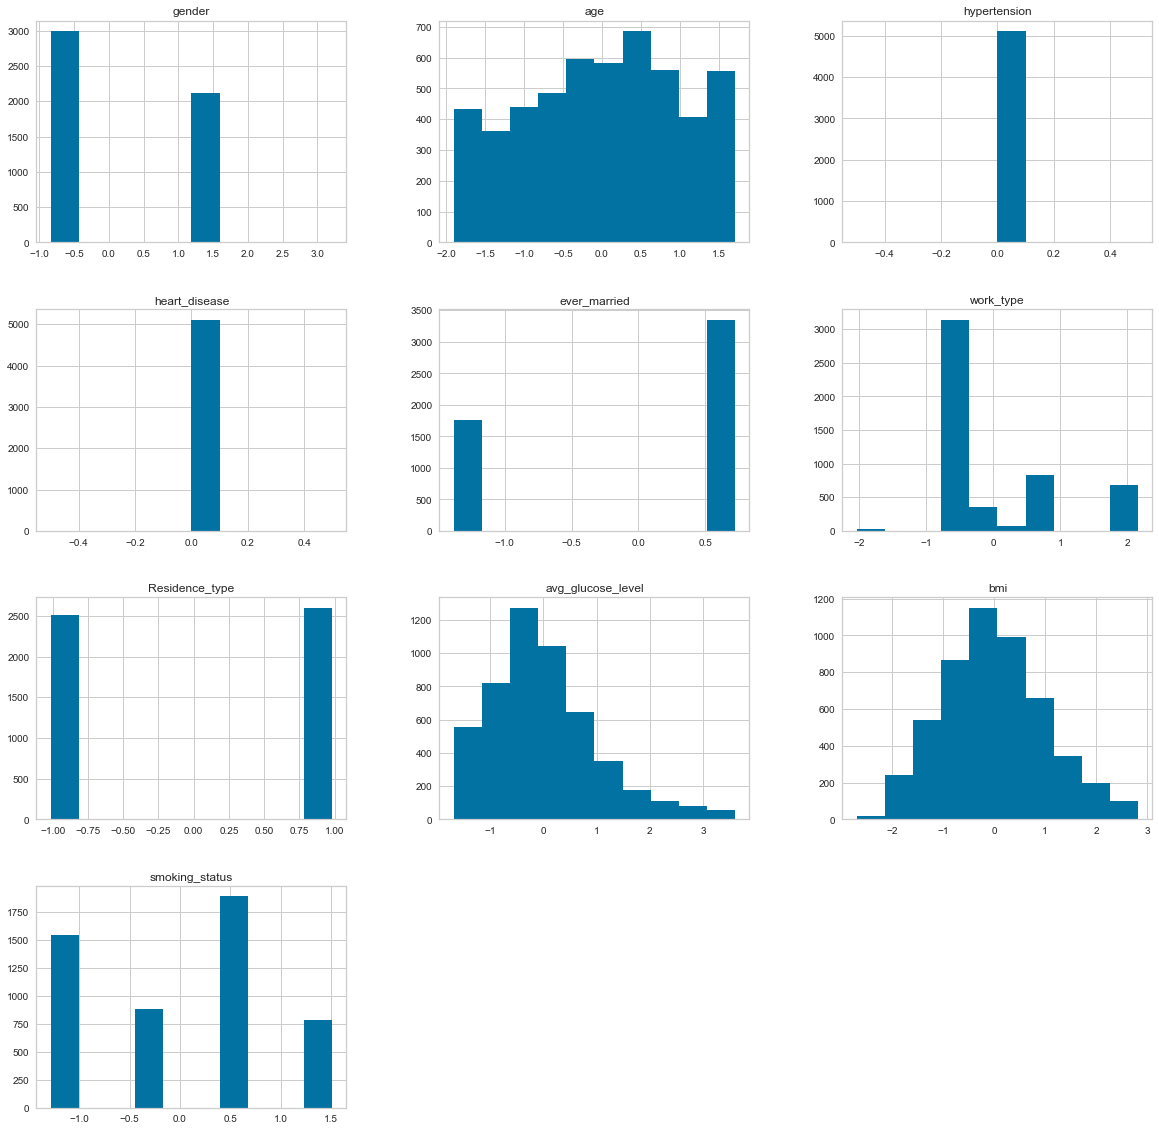

In [19]:

dataset.hist(figsize = (20, 20))
plt.show()


Рассмотрим исследование взаимосвязей между признаками

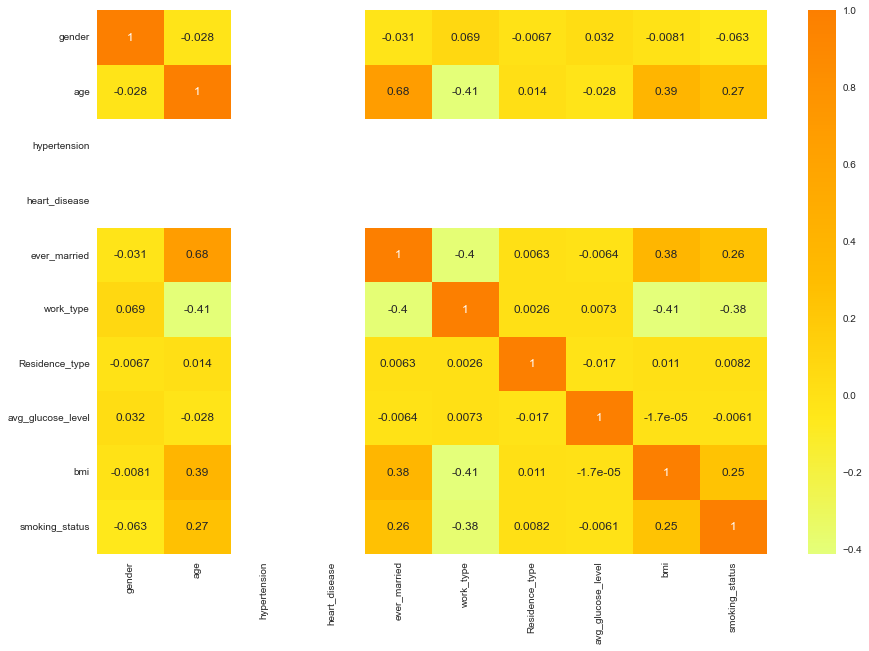

In [20]:
plt.figure(figsize=(15,10))
sns.heatmap(dataset.corr(), annot=True, cmap = 'Wistia')
plt.show()

Перейдем к масштабированию признаков

In [21]:
#Предварительная обработка данных. Используем MinMaxScaler, чтобы все признаки сходились строго в диапазоне от 0 до 1
from sklearn.preprocessing import MinMaxScaler
num = MinMaxScaler().fit_transform(dataset)
dataset = pd.DataFrame(data = num, columns=dataset.columns)
dataset.head()

gender       age  hypertension  heart_disease  ever_married  work_type  \
0     0.5  0.816895           0.0            0.0           1.0   0.333333   
1     0.0  0.743652           0.0            0.0           1.0   0.666667   
2     0.5  0.975586           0.0            0.0           1.0   0.333333   
3     0.0  0.597168           0.0            0.0           1.0   0.333333   
4     0.0  0.963379           0.0            0.0           1.0   0.666667   

   Residence_type  avg_glucose_level       bmi  smoking_status  
0             1.0           0.364565  0.706989        0.333333  
1             0.0           0.348679  0.611828        0.666667  
2             0.0           0.447341  0.596774        0.666667  
3             1.0           0.290067  0.647849        1.000000  
4             0.0           0.272966  0.368280        0.666667

In [22]:
dataset['stroke']=dataset1
dataset.describe()

gender          age  hypertension  heart_disease  ever_married  \
count  5110.000000  5110.000000        5110.0         5110.0   5110.000000   
mean      0.207143     0.526692           0.0            0.0      0.656164   
std       0.246522     0.276033           0.0            0.0      0.475034   
min       0.000000     0.000000           0.0            0.0      0.000000   
25%       0.000000     0.304199           0.0            0.0      0.000000   
50%       0.000000     0.548340           0.0            0.0      1.000000   
75%       0.500000     0.743652           0.0            0.0      1.000000   
max       1.000000     1.000000           0.0            0.0      1.000000   

         work_type  Residence_type  avg_glucose_level          bmi  \
count  5110.000000     5110.000000        5110.000000  5110.000000   
mean      0.484971        0.508023           0.318813     0.488192   
std       0.237836        0.499985           0.189142     0.180864   
min       0.000000        0.000000           0.000000     0.000000   
25%       0.333333        0.000000           0.189723     0.360215   
50%       0.333333        1.000000           0.292682     0.479570   
75%       0.666667        1.000000           0.416476     0.604435   
max       1.000000        1.000000           1.000000     1.000000   

       smoking_status       stroke  
count     5110.000000  5110.000000  
mean         0.458969     0.048728  
std          0.357178     0.215320  
min          0.000000     0.000000  
25%          0.000000     0.000000  
50%          0.666667     0.000000  
75%          0.666667     0.000000  
max          1.000000     1.000000

Также рассмотрим графики распределения взаимедействий отдельных ключевых признаков в зависимости от наличия инсульта


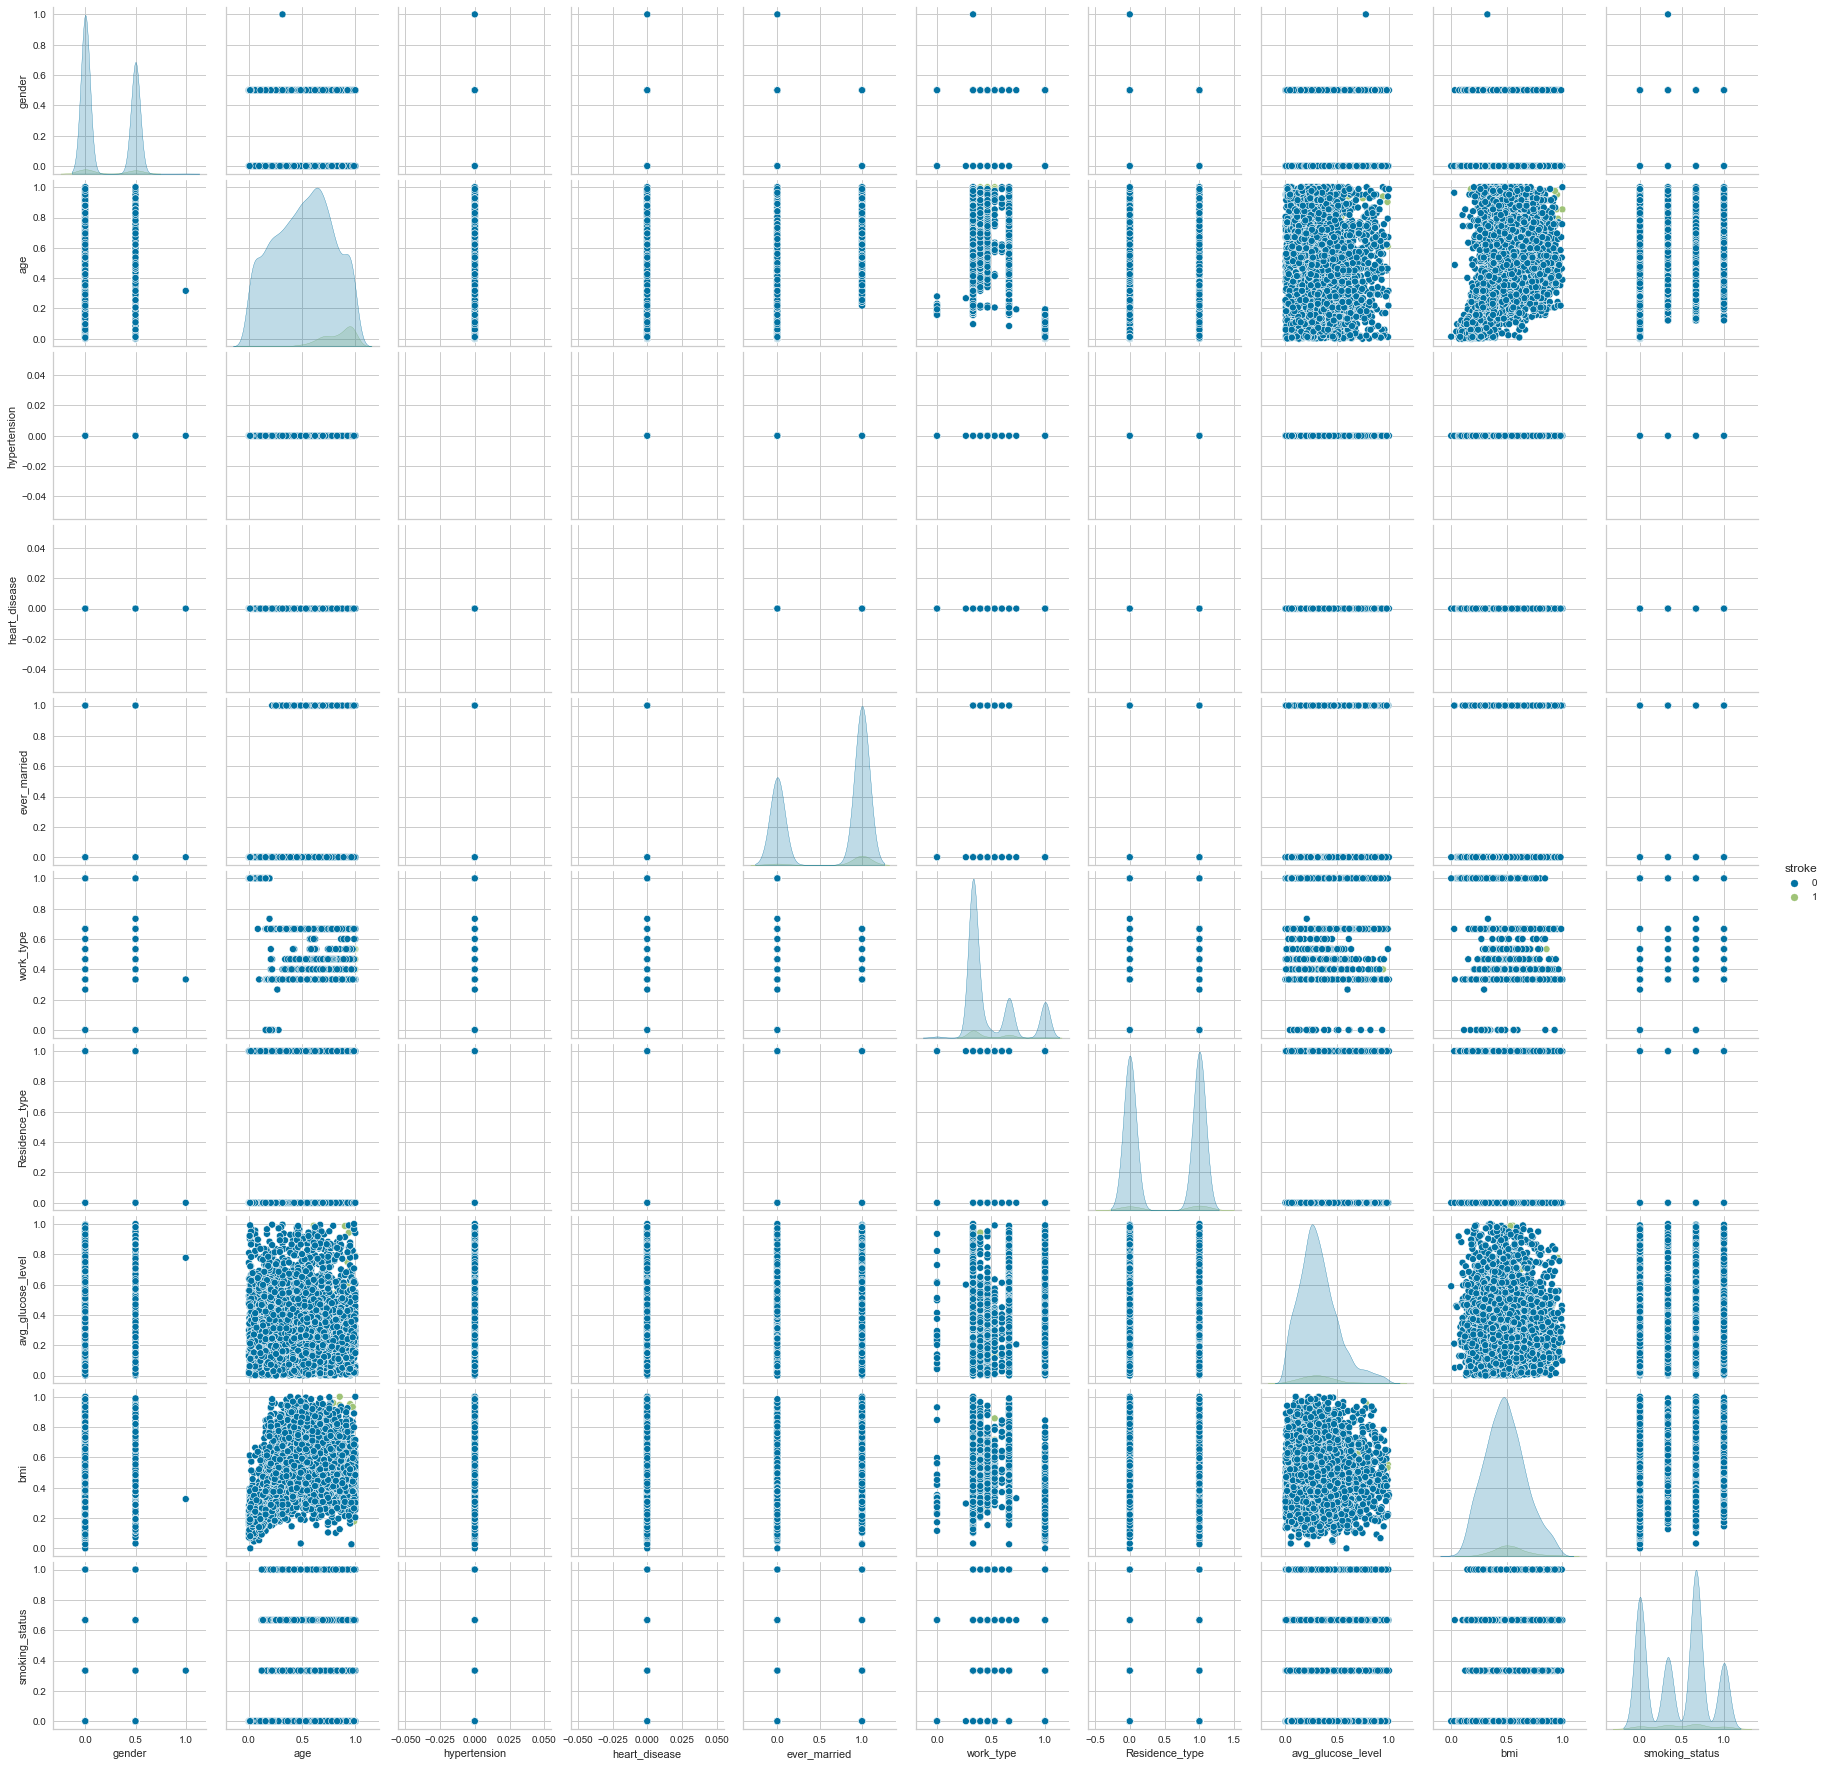

In [23]:
sns.pairplot(dataset, hue='stroke')

Cледующим шагом идет кластеризация 

Был выбран метод Fuzzy C-Means

    Алгоритм нечеткой кластеризации Fuzzy C-means является широко используемым подходом к проблеме категоризации наблюдаемых объектам по признакам. В отличие от четких алгоритмов, алгоритм Fuzzy C-means не относит объект однозначно к какому-нибудь кластеру, а сопоставляет каждому кластеру вероятность отнесения к нему наблюдаемых объектов, формируя, так называемую, матрицу принадлежности. Таким образом, на каждом шаге алгоритм каждый объект одновременно относится ко всем кластерам. 
    
    Задача кластеризации состоит в разбиении множества объектов на группы (кластеры) «похожих» между собой объектов. В 𝑛-мерном метрическом пространстве признаков мерой «сходства» двух объектов будем считать расстояние между ними.
    
    Задачей является нахождение матрицы 𝑀, минимизирующей критерий 𝐽. Для этого используется алгоритм нечётких 𝐶-средних, в основе которого лежит метод множителей Лагранжа. Он позволяет найти локальный оптимум, поэтому для различных запусков могут получиться разные результаты. 
    
    Необходимо отметить ключевые недостатки данного алгоритма: 
        • Высокая степень зависимости результирующего разбиения от начальной матрицы принадлежности. 
        • Необходимость априорного задания числа кластеров.


    

До начала построения модели было определено оптимальное количество кластеров при помощи метода локтя. Его суть заключается том, что он вычисляет сумму квадратов расстояний между точками и рассчитывает среднее значение расстояния. Был построен график зависимости между значениями k и суммой квадратов расстояния внутри кластера с целью получения значения k. В точке, в которой график перестанет резко уменьшаться по оси Х и будет находиться наше искомое и желанное оптимальное количество кластеров

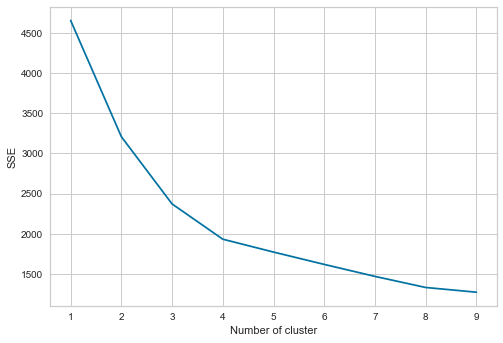

In [23]:
from sklearn.cluster import KMeans
data1 = dataset

sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(data1)
    data1["clusters"] = kmeans.labels_
    #print(data["clusters"])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

Из графика видно, что точками перегиба являются значения являются k=2, k=3, k=4

    Этого метода будет недостаточно, чтобы быть уверенным в оптимальном количестве кластеров. Именно поэтому я принял решение построить силуэтный коэффициент
    
    Силуэтный коэффициент показывает, на сколько среднее расстояние до объектов текущего кластера отличается от среднего расстояния до объектов ближайшего кластера. Данная величина лежит в диапазоне от минус одного до единицы. 
    
    Значения, близкие к минус одному, соответствуют плохой (разрозненной) кластеризации, значения, близкие к нулю, говорят о том, что кластеры пересекаются и накладываются друг на друга, значения, близкие к единице, соответствуют «плотным» четко выделенным кластерам. Таким образом, чем больше коэффициенты силуэтов, тем более четко выделены кластеры.  
    
    График, содержащий графическое представление силуэтных коэффициентов разбиения представленный на рисунке 4 свидетельствует о качественной кластеризации так как все из полученных силуэтных коэффициентов больше нуля, а средний коэффициент, изображенный в виде пунктирной линии, достаточно отдален от нуля.


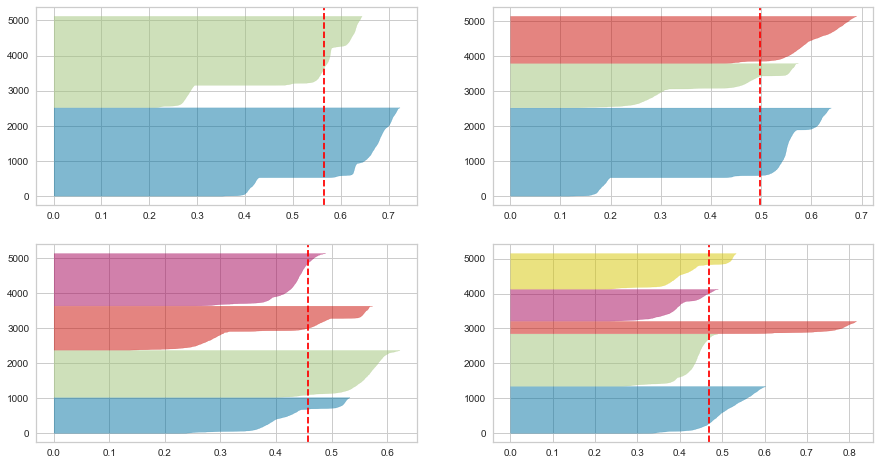

In [24]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer

data2 = dataset
fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(data2)

In [27]:
dataset.drop(['clusters'], axis=1)

gender       age  hypertension  heart_disease  ever_married  work_type  \
0        0.5  0.816895           0.0            0.0           1.0   0.333333   
1        0.0  0.743652           0.0            0.0           1.0   0.666667   
2        0.5  0.975586           0.0            0.0           1.0   0.333333   
3        0.0  0.597168           0.0            0.0           1.0   0.333333   
4        0.0  0.963379           0.0            0.0           1.0   0.666667   
...      ...       ...           ...            ...           ...        ...   
5105     0.0  0.975586           0.0            0.0           1.0   0.333333   
5106     0.0  0.987793           0.0            0.0           1.0   0.666667   
5107     0.0  0.426270           0.0            0.0           1.0   0.666667   
5108     0.5  0.621582           0.0            0.0           1.0   0.333333   
5109     0.0  0.536133           0.0            0.0           1.0   0.466667   

      Residence_type  avg_glucose_level       bmi  smoking_status  stroke  
0                1.0           0.364565  0.706989        0.333333       1  
1                0.0           0.348679  0.611828        0.666667       1  
2                0.0           0.447341  0.596774        0.666667       1  
3                1.0           0.290067  0.647849        1.000000       1  
4                0.0           0.272966  0.368280        0.666667       1  
...              ...                ...       ...             ...     ...  
5105             1.0           0.252113  0.595699        0.666667       0  
5106             1.0           0.617119  0.798387        0.666667       0  
5107             0.0           0.245421  0.545699        0.666667       0  
5108             0.0           0.978954  0.411290        0.333333       0  
5109             1.0           0.265586  0.427419        0.000000       0  

[5110 rows x 11 columns]

На текущий момент рассматриваются два варианта: Это 2 или 3 кластера соотвественно 

Стоит отметить, что при 2 кластерах силуетный индекс имеет большее значения. Однако при 2-х кластерах нельзя будет оценить кратину с досточным уровнем адекватности, поэтому следует провести анализ с 3-мя кластерами

Результаты, а также реализацию кода кластеризации при помощи ранее описанного метода Fuzzy C-means можно  ниже:

In [24]:
import pandas as pd
import numpy as np
import random
import operator
import math
import requests
import pandas as pd

columns = list(dataset.columns)
features = columns[:len(columns)-1]
class_labels = list(dataset[columns[-1]])
df = dataset[features]
# Number of Attributes
num_attr = len(df.columns) - 1

# Number of Clusters to make
k = 3

# Maximum number of iterations
MAX_ITER = 100

# Number of data points
n = len(df)

# Fuzzy parameter
m = 2.00



#### accuracy function for measuring the accuracy of our result

def accuracy(cluster_labels, class_labels):
    county = [0,0]
    countn = [0,0]
    tp = [0, 0]
    tn = [0, 0]
    fp = [0, 0]
    fn = [0, 0]
    
    for i in range(len(df)):
        # Yes = 1, No = 0
        if cluster_labels[i] == 1 and class_labels[i] == 1:
            tp[0] = tp[0] + 1
        if cluster_labels[i] == 0 and class_labels[i] == 0:
            tn[0] = tn[0] + 1
        if cluster_labels[i] == 1 and class_labels[i] ==0:
            fp[0] = fp[0] + 1
        if cluster_labels[i] == 0 and class_labels[i] == 1:
            fn[0] = fn[0] + 1
    
    for i in range(len(df)):
        # Yes = 0, No = 1
        if cluster_labels[i] == 0 and class_labels[i] == 0:
            tp[1] = tp[1] + 1
        if cluster_labels[i] == 1 and class_labels[i] == 1:
            tn[1] = tn[1] + 1
        if cluster_labels[i] == 0 and class_labels[i] == 1:
            fp[1] = fp[1] + 1
        if cluster_labels[i] == 1 and class_labels[i] == 0:
            fn[1] = fn[1] + 1
    
    a0 = float((tp[0] + tn[0]))/(tp[0] + tn[0] + fn[0] + fp[0])
    a1 = float((tp[1] + tn[1]))/(tp[1] + tn[1] + fn[1] + fp[1])
    p0 = float(tp[0])/(tp[0] + fp[0])
    p1 = float(tp[1])/(tp[1] + fp[1])
    r0 = float(tp[0])/(tp[0] + fn[0])
    r1 = float(tp[1])/(tp[1] + fn[1])
    
    accuracy = [a0*100,a1*100]
    precision = [p0*100,p1*100]
    recall = [r0*100,r1*100]
    
    return accuracy, precision, recall

### initializing the membership matrix with random values

def initializeMembershipMatrix():
    membership_mat = list()
    for i in range(n):
        random_num_list = [random.random() for i in range(k)]
        summation = sum(random_num_list)
        temp_list = [x/summation for x in random_num_list]
        membership_mat.append(temp_list)
    return membership_mat

### calculating the cluster center, is done in every iteration

def calculateClusterCenter(membership_mat):
    cluster_mem_val = list(zip(*membership_mat))
    cluster_centers = list()
    for j in range(k):
        x = list(cluster_mem_val[j])
        xraised = [e ** m for e in x]
        denominator = sum(xraised)
        temp_num = list()
        for i in range(n):
            data_point = list(df.iloc[i])
            prod = [xraised[i] * val for val in data_point]
            temp_num.append(prod)
        numerator = list(map(sum, list(zip(*temp_num))))
        center = [z/denominator for z in numerator]
        cluster_centers.append(center)
    return cluster_centers

### updating the membership values using the cluster centers

def updateMembershipValue(membership_mat, cluster_centers):
    p = float(2/(m-1))
    for i in range(n):
        x = list(df.iloc[i])
        distances = [np.linalg.norm(list(map(operator.sub, x, cluster_centers[j]))) for j in range(k)]
        for j in range(k):
            den = sum([math.pow(float(distances[j]/distances[c]), p) for c in range(k)])
            membership_mat[i][j] = float(1/den)       
    return membership_mat

def getClusters(membership_mat):
    cluster_labels = list()
    for i in range(n):
        max_val, idx = max((val, idx) for (idx, val) in enumerate(membership_mat[i]))
        cluster_labels.append(idx)
    return cluster_labels

### the final fcm function, 

def fuzzyCMeansClustering():
    # Membership Matrix
    membership_mat = initializeMembershipMatrix()
    curr = 0
    while curr <= MAX_ITER:
        cluster_centers = calculateClusterCenter(membership_mat)
        membership_mat = updateMembershipValue(membership_mat, cluster_centers)
        cluster_labels = getClusters(membership_mat)
        curr += 1
    
    print(membership_mat)
    return cluster_labels, cluster_centers

### calling the main function and storing the final results in labels, centers

print("printing the final membership matrix")

labels, centers = fuzzyCMeansClustering()

print("printing cluster centers")
print(centers)

### measuring the accuracy of the result

a,p,r = accuracy(labels, class_labels)

### printing the values

print("Accuracy = " + str(a))
print("Precision = " + str(p))
print("Recall = " + str(r))

printing the final membership matrix
[[0.7412693191567623, 0.09919445476978002, 0.15953622607345763], [0.1224561521124976, 0.07484451232776522, 0.8026993355597372], [0.17591960966076992, 0.09625756338352968, 0.7278228269557004], [0.721642599302722, 0.10034394531900247, 0.17801345537827545], [0.17395734229984988, 0.10504960825322654, 0.7209930494469237], [0.686990861112226, 0.11974498083674885, 0.1932641580510253], [0.1644216396992002, 0.09319264873103028, 0.7423857115697695], [0.38873831666679537, 0.4026904112221339, 0.2085712721110707], [0.200846093725108, 0.152375936937209, 0.646777969337683], [0.5907427646953513, 0.17397760466340548, 0.2352796306412432], [0.15431228941189734, 0.08082662765346708, 0.7648610829346356], [0.21105838079150865, 0.11851389278922052, 0.6704277264192708], [0.7179199597163691, 0.10223748573923434, 0.1798425545443966], [0.5995177134348947, 0.16980154068235392, 0.23068074588275134], [0.7864377069790303, 0.0740564033313032, 0.13950588968966662], [0.2387115786947

Имеем вполне сносную точность

In [25]:
d = pd.DataFrame(labels)
dataset = dataset.join(d)
dataset = dataset.rename(columns={0:'Cluster'})
dataset.head(100)

gender       age  hypertension  heart_disease  ever_married  work_type  \
0      0.5  0.816895           0.0            0.0           1.0   0.333333   
1      0.0  0.743652           0.0            0.0           1.0   0.666667   
2      0.5  0.975586           0.0            0.0           1.0   0.333333   
3      0.0  0.597168           0.0            0.0           1.0   0.333333   
4      0.0  0.963379           0.0            0.0           1.0   0.666667   
..     ...       ...           ...            ...           ...        ...   
95     0.0  0.951172           0.0            0.0           1.0   0.333333   
96     0.0  0.853516           0.0            0.0           1.0   0.666667   
97     0.5  0.707031           0.0            0.0           1.0   0.333333   
98     0.5  0.694824           0.0            0.0           1.0   0.400000   
99     0.0  0.841309           0.0            0.0           1.0   0.533333   

    Residence_type  avg_glucose_level       bmi  smoking_status  stroke  \
0              1.0           0.364565  0.706989        0.333333       1   
1              0.0           0.348679  0.611828        0.666667       1   
2              0.0           0.447341  0.596774        0.666667       1   
3              1.0           0.290067  0.647849        1.000000       1   
4              0.0           0.272966  0.368280        0.666667       1   
..             ...                ...       ...             ...     ...   
95             0.0           0.337372  0.591398        0.666667       1   
96             0.0           0.186862  0.379032        0.333333       1   
97             0.0           0.286791  0.567204        1.000000       1   
98             1.0           0.209581  0.467742        0.333333       1   
99             1.0           0.243836  0.475806        0.666667       1   

    Cluster  
0         0  
1         2  
2         2  
3         0  
4         2  
..      ...  
95        2  
96        2  
97        2  
98        0  
99        0  

[100 rows x 12 columns]

In [26]:
df_clusters = dataset.groupby('Cluster')['age','work_type']
df_clusters.describe()

age                                                              \
          count      mean       std       min       25%       50%       75%   
Cluster                                                                       
0        1738.0  0.666470  0.191060  0.230957  0.523926  0.658203  0.816895   
1        1705.0  0.251018  0.205321  0.000000  0.096680  0.206543  0.328613   
2        1667.0  0.662919  0.189091  0.218750  0.511719  0.658203  0.804687   

             work_type                                                    \
         max     count      mean       std       min       25%       50%   
Cluster                                                                    
0        1.0    1738.0  0.418220  0.136512  0.333333  0.333333  0.333333   
1        1.0    1705.0  0.622092  0.323613  0.000000  0.333333  0.333333   
2        1.0    1667.0  0.414317  0.134301  0.333333  0.333333  0.333333   

                             
              75%       max  
Cluster                      
0        0.466667  0.666667  
1        1.000000  1.000000  
2        0.466667  0.666667

In [27]:
df_clusters = dataset.groupby('Cluster')['avg_glucose_level','bmi','smoking_status']
df_clusters.describe()

avg_glucose_level                                                    \
                    count      mean       std       min       25%       50%   
Cluster                                                                       
0                  1738.0  0.317009  0.185094  0.000881  0.197891  0.292709   
1                  1705.0  0.321268  0.197123  0.000000  0.181842  0.289362   
2                  1667.0  0.318183  0.185023  0.000969  0.190780  0.294030   

                                bmi            ...                      \
              75%       max   count      mean  ...       75%       max   
Cluster                                        ...                       
0        0.405006  0.994540  1738.0  0.540742  ...  0.642473  1.000000   
1        0.434660  1.000000  1705.0  0.387315  ...  0.494624  0.983871   
2        0.417268  0.990402  1667.0  0.536582  ...  0.629032  1.000000   

        smoking_status                                                         \
                 count      mean       std  min       25%       50%       75%   
Cluster                                                                         
0               1738.0  0.535673  0.335017  0.0  0.333333  0.666667  0.666667   
1               1705.0  0.314956  0.361380  0.0  0.000000  0.000000  0.666667   
2               1667.0  0.526295  0.329750  0.0  0.333333  0.666667  0.666667   

              
         max  
Cluster       
0        1.0  
1        1.0  
2        1.0  

[3 rows x 24 columns]

In [35]:
df_clusters = dataset.groupby('Cluster')['stroke','age']
df_clusters.describe()

stroke                                                  age  \
          count      mean       std  min  25%  50%  75%  max   count   
Cluster                                                                
0        1738.0  0.069620  0.254579  0.0  0.0  0.0  0.0  1.0  1738.0   
1        1705.0  0.011144  0.105005  0.0  0.0  0.0  0.0  1.0  1705.0   
2        1667.0  0.065387  0.247282  0.0  0.0  0.0  0.0  1.0  1667.0   

                                                                          
             mean       std       min       25%       50%       75%  max  
Cluster                                                                   
0        0.666470  0.191060  0.230957  0.523926  0.658203  0.816895  1.0  
1        0.251018  0.205321  0.000000  0.096680  0.206543  0.328613  1.0  
2        0.662919  0.189091  0.218750  0.511719  0.658203  0.804687  1.0

In [29]:
df_clusters = dataset.groupby('Cluster')['bmi','stroke']
df_clusters.describe()

bmi                                                              \
          count      mean       std       min       25%       50%       75%   
Cluster                                                                       
0        1738.0  0.540742  0.162324  0.026882  0.424731  0.521505  0.642473   
1        1705.0  0.387315  0.180044  0.000000  0.247312  0.354839  0.494624   
2        1667.0  0.536582  0.155080  0.032258  0.432796  0.521505  0.629032   

                   stroke                                               
              max   count      mean       std  min  25%  50%  75%  max  
Cluster                                                                 
0        1.000000  1738.0  0.069620  0.254579  0.0  0.0  0.0  0.0  1.0  
1        0.983871  1705.0  0.011144  0.105005  0.0  0.0  0.0  0.0  1.0  
2        1.000000  1667.0  0.065387  0.247282  0.0  0.0  0.0  0.0  1.0

In [36]:
df_clusters = dataset.groupby('Cluster')['Residence_type','heart_disease','hypertension']
df_clusters.describe()

Residence_type                                               \
                 count      mean       std  min  25%  50%  75%  max   
Cluster                                                               
0               1738.0  1.000000  0.000000  1.0  1.0  1.0  1.0  1.0   
1               1705.0  0.503226  0.500136  0.0  0.0  1.0  1.0  1.0   
2               1667.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0   

        heart_disease       ...           hypertension                      \
                count mean  ...  75%  max        count mean  std  min  25%   
Cluster                     ...                                              
0              1738.0  0.0  ...  0.0  0.0       1738.0  0.0  0.0  0.0  0.0   
1              1705.0  0.0  ...  0.0  0.0       1705.0  0.0  0.0  0.0  0.0   
2              1667.0  0.0  ...  0.0  0.0       1667.0  0.0  0.0  0.0  0.0   

                        
         50%  75%  max  
Cluster                 
0        0.0  0.0  0.0  
1        0.0  0.0  0.0  
2        0.0  0.0  0.0  

[3 rows x 24 columns]

1 кластер меньше курит, меньше перенес инсультов, имеет более высокий уровень глюкозы и является более молодым представителем датасета. 0 и 2 кластеров при схожести на первый взгляд отличает место проживания. 0 кластер проживает преимущественно в городе, а 2 в сельской местности

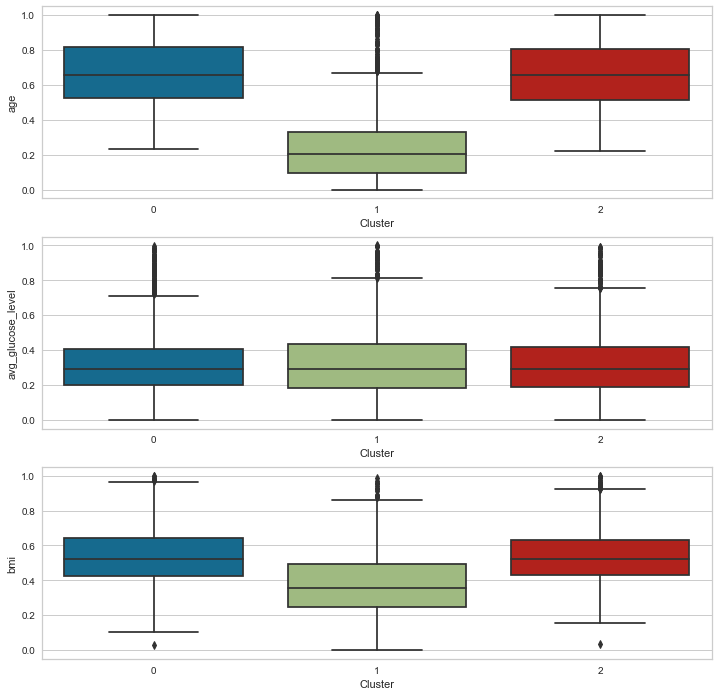

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

In [30]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows = 3,figsize=(12,12))

plt.figure(figsize=(12,8))
plot1 = sns.boxplot(x=dataset['Cluster'],y=dataset['age'],data=dataset, ax = ax1)

plt.figure(figsize=(12,8))
plot2 = sns.boxplot(x=dataset['Cluster'],y=dataset['avg_glucose_level'],data=dataset, ax= ax2)
plt.figure(figsize=(12,8))
plot2 = sns.boxplot(x=dataset['Cluster'],y=dataset['bmi'],data=dataset, ax= ax3)

In [31]:
display(dataset.head())
print(centers)

gender       age  hypertension  heart_disease  ever_married  work_type  \
0     0.5  0.816895           0.0            0.0           1.0   0.333333   
1     0.0  0.743652           0.0            0.0           1.0   0.666667   
2     0.5  0.975586           0.0            0.0           1.0   0.333333   
3     0.0  0.597168           0.0            0.0           1.0   0.333333   
4     0.0  0.963379           0.0            0.0           1.0   0.666667   

   Residence_type  avg_glucose_level       bmi  smoking_status  stroke  \
0             1.0           0.364565  0.706989        0.333333       1   
1             0.0           0.348679  0.611828        0.666667       1   
2             0.0           0.447341  0.596774        0.666667       1   
3             1.0           0.290067  0.647849        1.000000       1   
4             0.0           0.272966  0.368280        0.666667       1   

   Cluster  
0        0  
1        2  
2        2  
3        0  
4        2

[[0.1885700269465502, 0.6373384904331418, 0.0, 0.0, 0.9111063808526189, 0.4231821770168856, 0.9268025141096274, 0.311286719322307, 0.530559402006737, 0.5449018814848489], [0.2284377001486526, 0.25001028160203437, 0.0, 0.0, 0.08191631744703297, 0.6685122567609862, 0.5074994784540282, 0.3206687792427954, 0.37330419122681935, 0.2479140156644112], [0.19683367165743845, 0.6323792821359818, 0.0, 0.0, 0.9076929686747772, 0.42053568518144435, 0.07931400059655594, 0.3144907259925618, 0.5276520655677401, 0.5357105745701337]]


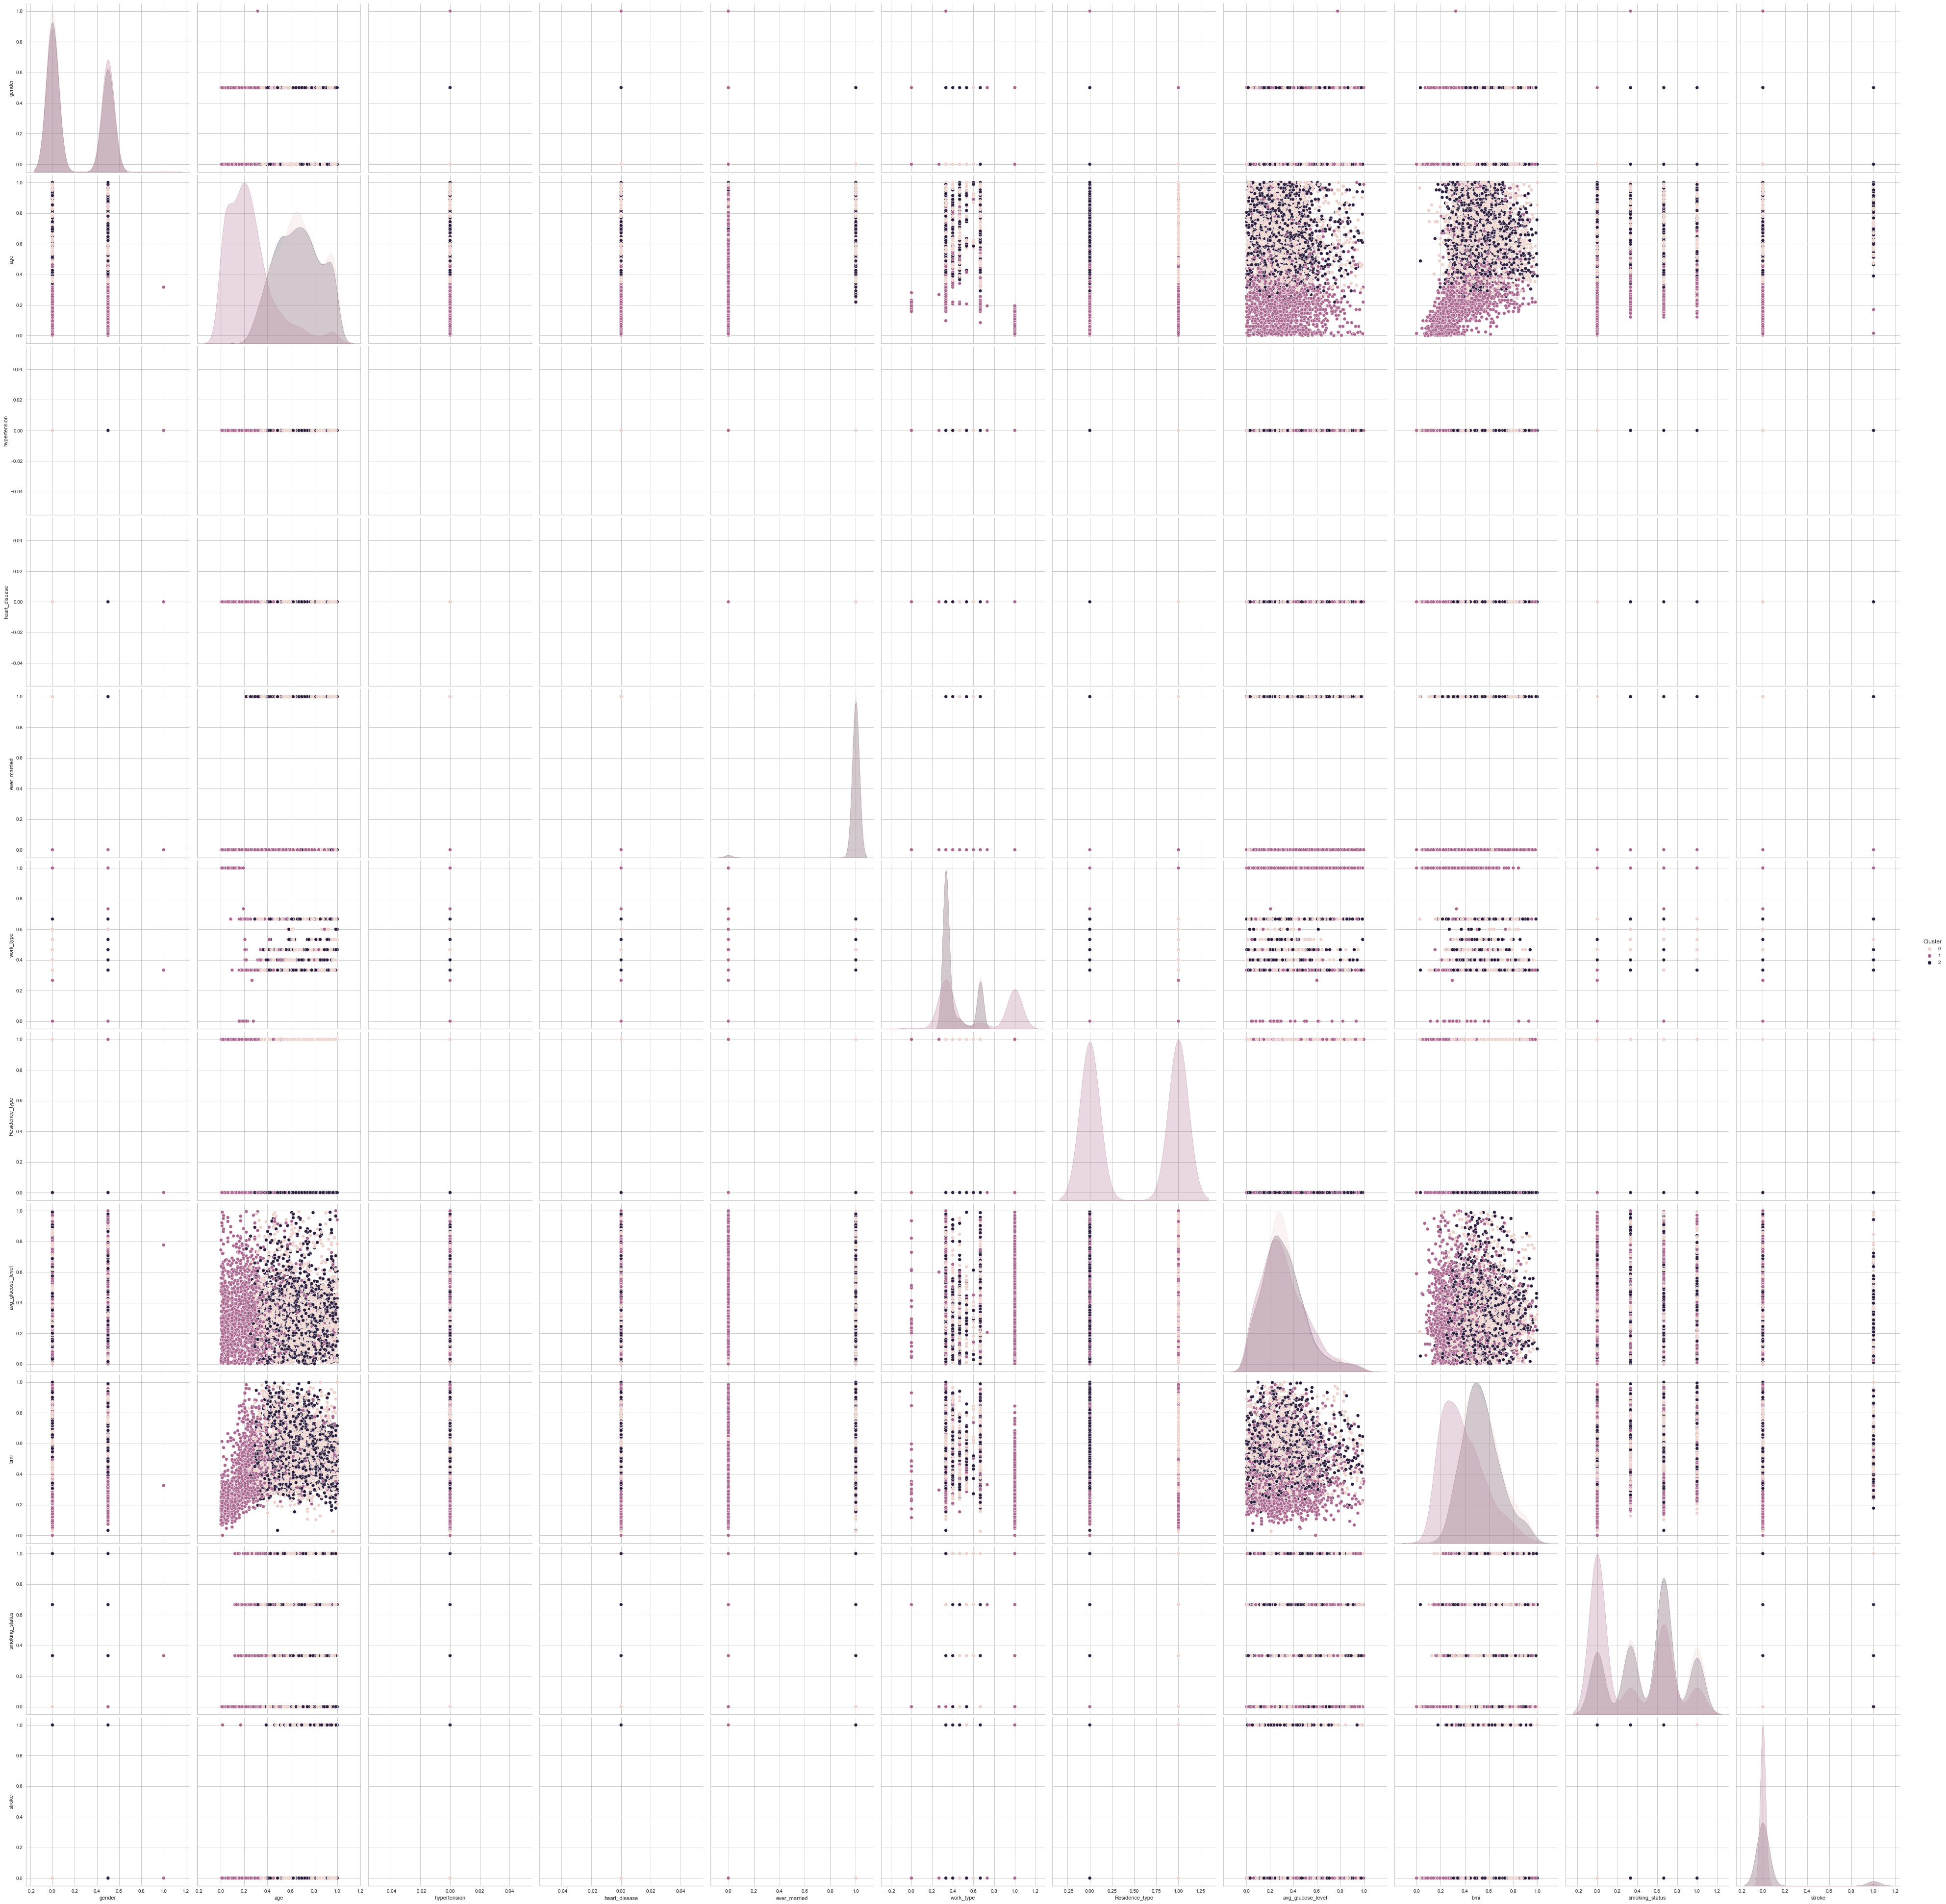

In [32]:
sns.set_style("whitegrid")
sns.pairplot(dataset, hue = 'Cluster', height=5);
plt.show()

In [34]:
dataset['Cluster'].value_counts()

0    1738
1    1705
2    1667
Name: Cluster, dtype: int64

2. Классификация

На том же датасете про страны попробуем осуществить задачу классификации. Предположим, что определенный нами номер кластера - истина и уже известен.

Задача следующая: определить набор фичей, которые помогут предсказать в дальнейшем уровень развития страны.

Исходный датафрейм:

In [37]:
dataset.head()

gender       age  hypertension  heart_disease  ever_married  work_type  \
0     0.5  0.816895           0.0            0.0           1.0   0.333333   
1     0.0  0.743652           0.0            0.0           1.0   0.666667   
2     0.5  0.975586           0.0            0.0           1.0   0.333333   
3     0.0  0.597168           0.0            0.0           1.0   0.333333   
4     0.0  0.963379           0.0            0.0           1.0   0.666667   

   Residence_type  avg_glucose_level       bmi  smoking_status  stroke  \
0             1.0           0.364565  0.706989        0.333333       1   
1             0.0           0.348679  0.611828        0.666667       1   
2             0.0           0.447341  0.596774        0.666667       1   
3             1.0           0.290067  0.647849        1.000000       1   
4             0.0           0.272966  0.368280        0.666667       1   

   Cluster  
0        0  
1        2  
2        2  
3        0  
4        2

В качестве фич рассмотрим все присущетсвующие признаки, цель - кластер.

Рассмотрим 3 метода классификации и определим наиболее точный:

    метод ближайших соседей

    метод опорных векторов

    метод случайного леса



Начинаем с разделения нашей выборки на учебную и тестовую:

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

data = dataset.sample(frac=1)
X = data[['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type','Residence_type','avg_glucose_level','bmi','smoking_status',]]
y = data['Cluster']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [39]:
def mae(y_test, y_pred):
    return np.mean(abs(y_test - y_pred))


def fit_and_evaluate(model):
    
    # Учим модель
    model.fit(X_train, y_train)
    

    model_pred = model.predict(X_test)
    model_mae = mae(y_test, model_pred)
    

    return model_mae

In [40]:
knn = KNeighborsClassifier(n_neighbors=5)
knn_mae = fit_and_evaluate(knn)

print('KNeighborsClassifier Performance on the test set: MAE = %0.4f' % knn_mae)

svm = SVC(kernel='linear')
svm_mae = fit_and_evaluate(svm)

print('Support Vector Machine Performance on the test set: MAE = %0.4f' % svm_mae)

random_forest_cl = RandomForestClassifier(n_estimators=20)
random_forest_cl_mae = fit_and_evaluate(random_forest_cl)

print('Random Forest Classifier Performance on the test set: MAE = %0.4f' % random_forest_cl_mae)

KNeighborsClassifier Performance on the test set: MAE = 0.0052
Support Vector Machine Performance on the test set: MAE = 0.0104
Random Forest Classifier Performance on the test set: MAE = 0.0059


Наиболее точным оказался метод случайного леса

In [44]:
X = data[['Residence_type', 'age','ever_married']]
y = data['Cluster']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

gender=1
age=0.56
hypertension=1
heart_disease=0
ever_married=1
work_type=0.2
Residence_type=0.5
avg_glucose_level=1
bmi=1
smoking_status=0
stroke=1


model = RandomForestClassifier(n_estimators=20)
model.fit(X_train, y_train)
new_country = model.predict([[Residence_type, age,ever_married]])
new_country

array([2], dtype=int64)

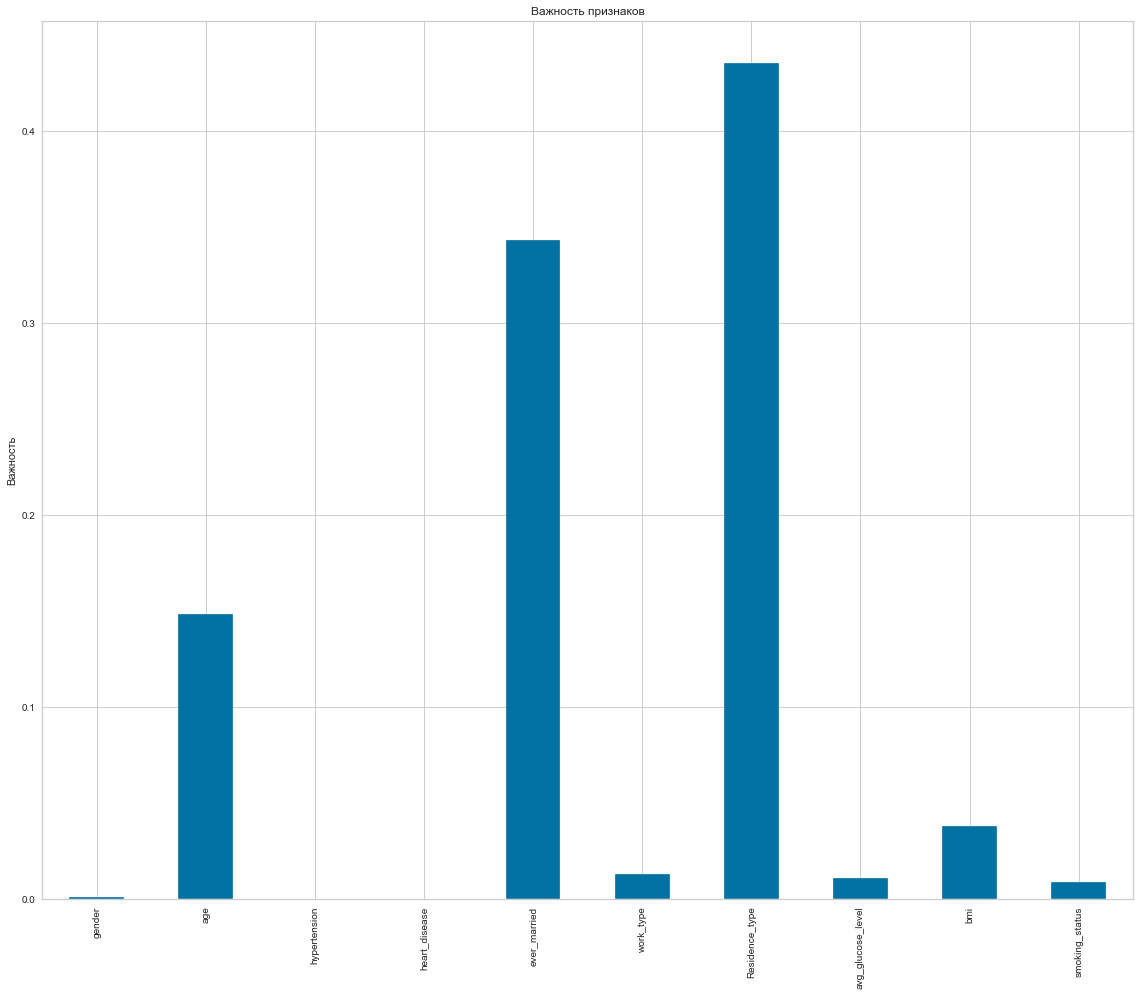

In [41]:
random_forest_cl = RandomForestClassifier(n_estimators=20)
random_forest_cl.fit(X_train, y_train)
random_forest_cl_imp = pd.Series(random_forest_cl.feature_importances_,
                         X_train.columns)

fig, ax = plt.subplots(figsize=(16,14))
random_forest_cl_imp.plot.bar(ax=ax)
ax.set_title("Важность признаков")
ax.set_ylabel('Важность')
fig.tight_layout()

Выводы:

    Решив задачу кластеризации, нам удалось выделить группы людей по их риску возникноваения инсульта и удалось определть наиболее подверженные группы населения. 

    Задача классификации позволяет предсказать кластер для страны, ранее не участвоващей в анализе. Таким образом, можно происследовать оставшиеся страны и, возможно, дополнить список стран, которым необходима финансовая помощь.